In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

### **Data Cleaning and Preprocessing**
 Identifying and handling missing or incomplete data entries in the dataset.
 


In [147]:
d=pd.read_csv('Dhaka_PM2.5_2016.csv')
df=d[d['QC Name']!='Missing'].copy()
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,-999.0,196,ug/m3,-999,NaN,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


There is two row don't have **AQI** and **NowCast Conc.** value but have **Raw Concentration**. Averaging AQI and NowCast Conc. for the same Raw Concentration and put those values in those invalid AQI and NowCast Conc. values.

Let's fix it using average of that particular **Raw concentration**

In [148]:
aqi_196=df[(df['Raw Conc.']==196) & (df['AQI']>0)]['AQI'].mean().round()
aqi_26=df[(df['Raw Conc.']==26) & (df['AQI']>0)]['AQI'].mean().round()
nc_196=df[(df['Raw Conc.']==196) & (df['NowCast Conc.']>0)]['NowCast Conc.'].mean().round()
nc_26=df[(df['Raw Conc.']==26) & (df['NowCast Conc.']>0)]['NowCast Conc.'].mean().round()

In [149]:
df.loc[((df['Raw Conc.']==196) & (df['AQI']<0)),'AQI']=aqi_196
df.loc[((df['Raw Conc.']==26) & (df['AQI']<0)),'AQI']=aqi_26
df.loc[((df['Raw Conc.']==196) & (df['NowCast Conc.']<0)),'NowCast Conc.']=nc_196
df.loc[((df['Raw Conc.']==26) & (df['NowCast Conc.']<0)),'NowCast Conc.']=nc_26
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,NaN,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


### Adding AQI Category column to the dataset

In [150]:
def cat(x):
    if x<=25:
        return 'Good'
    elif x<=100:
        return 'Moderate'
    elif x<=150:
        return 'Unhealthy for Sensitive Groups'
    elif x<=200:
        return 'Unhealthy'
    elif x<=300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
df['AQI Category']=df['AQI'].apply(cat)
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


### Basic statistics of the dataset

In [151]:
df.describe()

,Hour,NowCast Conc.,Raw Conc.,AQI
count,7325.000000,7325.000000,7325.000000,7325.000000
mean,11.507440,67.827345,67.852287,136.157270
std,6.923973,55.071697,57.419450,55.508329
min,0.000000,6.600000,5.000000,28.000000
25%,6.000000,31.700000,30.000000,92.000000
50%,12.000000,48.200000,48.000000,132.000000
75%,18.000000,81.900000,82.000000,165.000000
max,23.000000,364.900000,413.000000,411.000000



**Outlier Detection**:
 - Detecting outliers in **AQI** values using statistical methods (IQR, Z-scores).
 - Analyzing whether these outliers represent measurement errors or extreme pollution events.


In [152]:
q1=np.percentile(df['AQI'],25)
q3=np.percentile(df['AQI'],75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

out=df[(df['AQI']<lb) | (df['AQI']>ub)]['AQI'].count()
print('Number of outlier is: ',out)

Number of outlier is:  174


In the dataset there are 174 outlier.
Now we are creating the dataset that don't have any outlier

In [153]:
nout=df[~((df['AQI']<lb) | (df['AQI']>ub))]

In [154]:
ex=nout[nout['AQI']>300]['AQI'].count()
print('Number of extreme events',ex)

Number of extreme events 0


So, we can see that there is no extreme values in the dataset which don't have outlier

Adding z-score to the dataset

In [155]:
df['z_AQI']=zscore(df['AQI'])
#d[d['z_AQI']>3]['z_AQI'].count()
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid,1.906920
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.987913
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.879814
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid,3.204111
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid,3.077996
...,...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid,2.411383
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid,3.077996
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid,3.168078
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid,3.690558


Finding outlier using z-score

In [156]:
z_out=df[abs(df['z_AQI'])>3]['AQI'].count()
print('Number of outlier:',z_out)

Number of outlier: 99


Creating dataset that dont have any **Outlier** using z-score

In [157]:
df=df[abs(df['z_AQI'])<3]
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid,1.906920
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.987913
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.879814
1446,01/03/2016 07:00,7,238.2,205,ug/m3,288,Very Unhealthy,Valid,2.735681
1447,01/03/2016 08:00,8,227.7,208,ug/m3,278,Very Unhealthy,Valid,2.555516
...,...,...,...,...,...,...,...,...,...
8775,31/12/2016 16:00,16,146.7,133,ug/m3,198,Unhealthy,Valid,1.114192
8776,31/12/2016 17:00,17,138.3,130,ug/m3,194,Unhealthy,Valid,1.042126
8777,31/12/2016 18:00,18,150.9,164,ug/m3,201,Very Unhealthy,Valid,1.168242
8778,31/12/2016 19:00,19,196.5,242,ug/m3,247,Very Unhealthy,Valid,1.997003


Creating new DataFrame having daily averages of NowCast Conc., Raw Conc., AQI with date and categorize the Daily Avg AQI

In [158]:
df=df.copy()

In [159]:
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'], format='%d/%m/%Y %H:%M')

In [160]:
print(df['Date (LT)'].dtype)


datetime64[ns]


In [161]:
df.loc[:,'date']=df['Date (LT)'].dt.date
col=['Date','Daily Avg NowCast Conc.','Daily Avg Raw Conc.','Daily Avg AQI']
av=df.groupby('date').agg({'NowCast Conc.':'mean','Raw Conc.':'mean','AQI':'mean'}).reset_index()
av.columns=col
av

,Date,Daily Avg NowCast Conc.,Daily Avg Raw Conc.,Daily Avg AQI
0,2016-03-01,180.855000,181.000000,236.000000
1,2016-03-02,127.933333,119.388889,197.722222
2,2016-03-03,120.868750,114.687500,190.937500
3,2016-03-04,89.145833,93.583333,170.958333
4,2016-03-05,128.129167,122.833333,190.625000
...,...,...,...,...
301,2016-12-27,166.545833,161.125000,222.208333
302,2016-12-28,146.645833,147.625000,203.416667
303,2016-12-29,158.725000,156.791667,212.541667
304,2016-12-30,163.269565,163.043478,219.521739


### Adding AQI Category

In [162]:
av['Daily Avg AQI Category']=av['Daily Avg AQI'].apply(cat)
av

,Date,Daily Avg NowCast Conc.,Daily Avg Raw Conc.,Daily Avg AQI,Daily Avg AQI Category
0,2016-03-01,180.855000,181.000000,236.000000,Very Unhealthy
1,2016-03-02,127.933333,119.388889,197.722222,Unhealthy
2,2016-03-03,120.868750,114.687500,190.937500,Unhealthy
3,2016-03-04,89.145833,93.583333,170.958333,Unhealthy
4,2016-03-05,128.129167,122.833333,190.625000,Unhealthy
...,...,...,...,...,...
301,2016-12-27,166.545833,161.125000,222.208333,Very Unhealthy
302,2016-12-28,146.645833,147.625000,203.416667,Very Unhealthy
303,2016-12-29,158.725000,156.791667,212.541667,Very Unhealthy
304,2016-12-30,163.269565,163.043478,219.521739,Very Unhealthy


**Feature Engineering**:<br/>
Selecting feature and target

In [163]:
x=av.drop(['Daily Avg AQI','Daily Avg AQI Category'],axis=1)
x.set_index('Date',inplace=True)

In [164]:
y=av['Daily Avg AQI']
y

0      236.000000
1      197.722222
2      190.937500
3      170.958333
4      190.625000
          ...    
301    222.208333
302    203.416667
303    212.541667
304    219.521739
305    230.952381
Name: Daily Avg AQI, Length: 306, dtype: float64

Using for loop to find the highest accuracy

In [165]:
from sklearn.preprocessing import PolynomialFeatures
b=[]
c=[]
for i in np.linspace(0.1,0.9,100):
    xtr=x[:int(len(x)*i)]
    xts=x[int(len(x)*i):]
    ytr=y[:int(len(y)*i)]
    yts=y[int(len(y)*i):]
    poly = PolynomialFeatures(degree=1)
    xpoly = poly.fit_transform(xtr)
    model_poly = LinearRegression()
    model_poly.fit(xpoly,ytr)
    xpoly_ts=poly.fit_transform(xts)
    ypre=model_poly.predict(xpoly_ts)
    z=model_poly.score(xpoly_ts,yts)
    b.append(i)
    c.append(z)
a=pd.DataFrame({'i':b,'score':c})
s=a[a.score==a.score.max()]['i'].values[0]

Using the highest accuracy spliting value to take train test data

In [166]:
xtr=x[:int(len(x)*s)]
xts=x[int(len(x)*s):]

In [167]:
ytr=y[:int(len(y)*s)]
yts=y[int(len(y)*s):]

### Fitting Regression

In [168]:
poly = PolynomialFeatures(degree=1)
xpoly = poly.fit_transform(xtr)
model_poly = LinearRegression()
model_poly.fit(xpoly,ytr)



LinearRegression()

In [169]:
xpoly_ts=poly.fit_transform(xts)
ypre=model_poly.predict(xpoly_ts)

In [170]:
print('Model accuracy:',round(model_poly.score(xpoly_ts,yts),4)*100,'%')

Model accuracy: 91.84 %


In [171]:
print(f"Intercept: {model_poly.intercept_}, Coefficient: {model_poly.coef_[0]}")

Intercept: 69.47475581764172, Coefficient: 0.0


<function matplotlib.pyplot.show(close=None, block=None)>

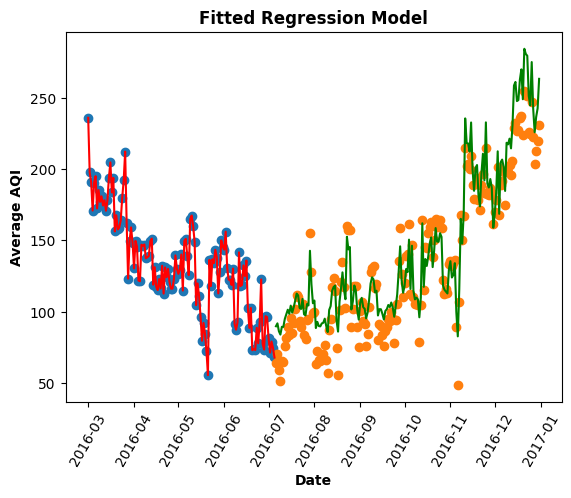

In [220]:
plt.scatter(xtr.index,ytr)
plt.plot(xtr.index,ytr,color='r')
plt.scatter(xts.index,yts)
plt.plot(xts.index,ypre,color='g')
plt.xticks(rotation=60)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Average AQI',fontweight='bold')
plt.title('Fitted Regression Model', fontweight='bold')
plt.savefig("reg.png") 
plt.show

### Calculating the percentage of days with **Very unhealthy** air quality levels.

In [173]:
p=(av[av['Daily Avg AQI Category']=='Very Unhealthy']['Daily Avg AQI'].count()*100)/av.Date.count()
print('percentage of days with "hazardous" air quality levels:', round(p,2),'%')

percentage of days with "hazardous" air quality levels: 9.8 %


## Visualizing AQI Category Count

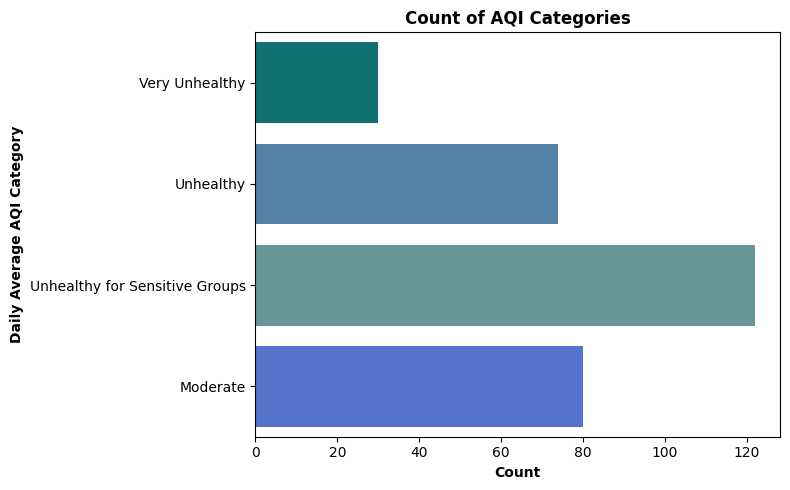

In [221]:
plt.figure(figsize = (8,5))
colors =  ['teal', 'steelblue', 'cadetblue', 'royalblue']
sns.countplot(y=av['Daily Avg AQI Category'],hue=av['Daily Avg AQI Category'], palette=colors)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Daily Average AQI Category', fontweight = 'bold')
plt.title('Count of AQI Categories', fontweight = 'bold' )
plt.tight_layout()
plt.savefig("cat.png") 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

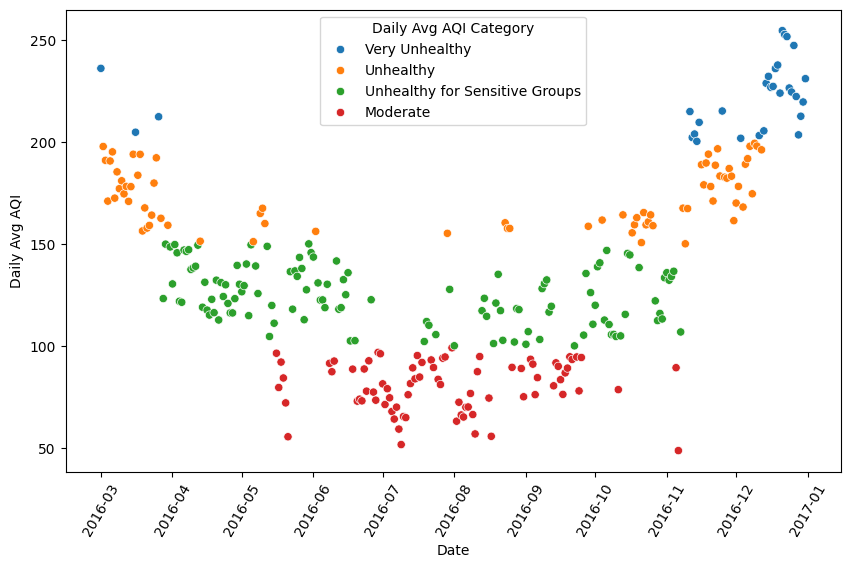

In [222]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Date', y='Daily Avg AQI', hue=av['Daily Avg AQI Category'], data=av)

plt.xticks(rotation=60)
plt.savefig("avg cat.png") 
plt.show

### Visualizing how air quality levels have changed year over year.

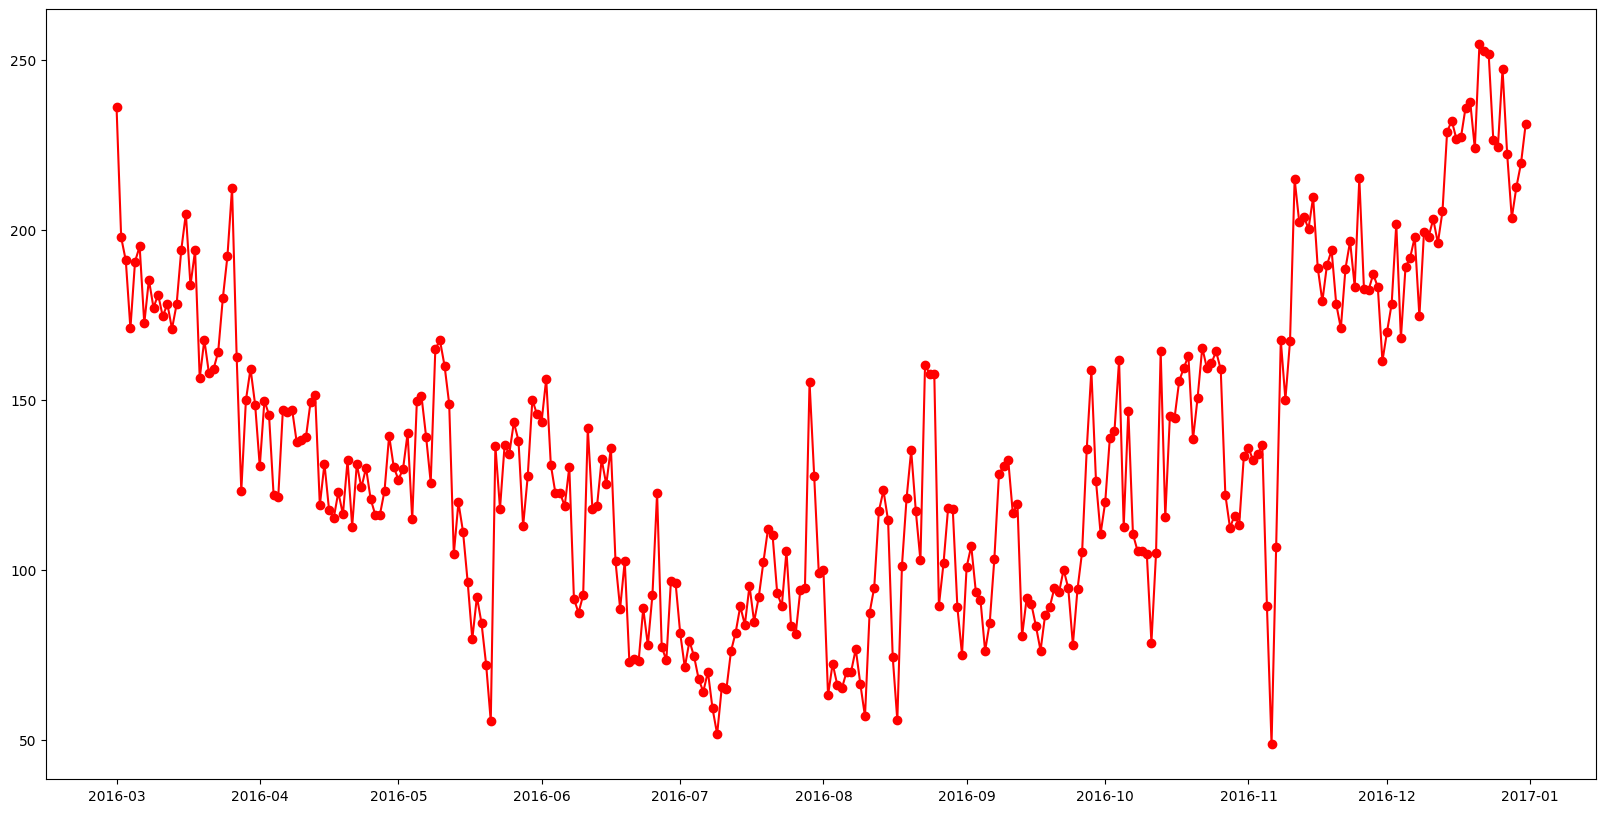

In [223]:
plt.figure(figsize=(20,10))
plt.plot(av['Date'],av['Daily Avg AQI'],marker='o',label='Daily Average AQI',color='red')
plt.savefig("yearly.png") 
plt.show()

#### Examining how pollution levels change during the day (morning, afternoon, evening, night)

In [217]:
def t_cat(x):
    if x>=6 and x<12:
        return 'Morning'
    elif x>=12 and x<18:
        return 'After Noon'
    elif x>=18 and x<21:
        return 'Evening'
    else:
        return 'Night'

In [218]:
df.loc[:,'Time Period']=df['Hour'].apply(t_cat)

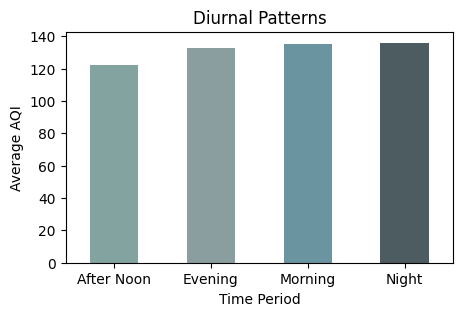

In [224]:
avp=df.groupby(df['Time Period'])['AQI'].median()
plt.figure(figsize=(5,3))
avp.plot(kind='bar', color=['#83a3a0','#8a9ea0','#6a95a0','#4d5c60'])
plt.xticks(rotation=0)
plt.xlabel('Time Period')
plt.ylabel('Average AQI')
plt.title('Diurnal Patterns')
plt.savefig("diurnal.png") 
plt.show()

#### Comparing pollution levels across seasons (winter, summer, monsoon).


In [180]:
def sn(x):
    if x>=3 and x<=5:
        return 'Summer'
    elif x>5 and x<=9:
        return 'Monsoon'
    elif x>9 and x<=11:
        return 'Autum'
    elif x>5 and x<=9:
        return 'Monsoon'
    else:
        return 'Winter'
df.loc[:,'Season']=df['Date (LT)'].dt.month.apply(sn)
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI,date,Time Period,Season
1441,2016-03-01 02:00:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid,1.906920,2016-03-01,Night,Summer
1442,2016-03-01 03:00:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.987913,2016-03-01,Night,Summer
1443,2016-03-01 04:00:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.879814,2016-03-01,Night,Summer
1446,2016-03-01 07:00:00,7,238.2,205,ug/m3,288,Very Unhealthy,Valid,2.735681,2016-03-01,Morning,Summer
1447,2016-03-01 08:00:00,8,227.7,208,ug/m3,278,Very Unhealthy,Valid,2.555516,2016-03-01,Morning,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
8775,2016-12-31 16:00:00,16,146.7,133,ug/m3,198,Unhealthy,Valid,1.114192,2016-12-31,After Noon,Winter
8776,2016-12-31 17:00:00,17,138.3,130,ug/m3,194,Unhealthy,Valid,1.042126,2016-12-31,After Noon,Winter
8777,2016-12-31 18:00:00,18,150.9,164,ug/m3,201,Very Unhealthy,Valid,1.168242,2016-12-31,Evening,Winter
8778,2016-12-31 19:00:00,19,196.5,242,ug/m3,247,Very Unhealthy,Valid,1.997003,2016-12-31,Evening,Winter


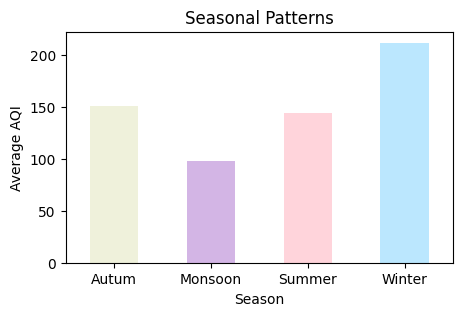

In [225]:
aqi_s=df.groupby(df['Season'])['AQI'].mean()
plt.figure(figsize=(5,3))
aqi_s.plot(kind='bar', color=['#eff1db','#d3b5e5','#ffd4db','#bbe7fe'])
plt.xticks(rotation=0)
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.title('Seasonal Patterns')
plt.savefig('example_plot.png', format='png', dpi=300)
plt.savefig("season.png") 
plt.show()


From the graph we can see that there is a pick in winter and autum

**Weekday vs. Weekend Pollution**:<br/>
Study differences in air quality between weekdays and weekends.

In [182]:
av['Weekday_or_Not'] = av['Date'].apply(lambda x: 'Weekday' if pd.Timestamp(x).weekday() < 5 else 'Weekend')
av

,Date,Daily Avg NowCast Conc.,Daily Avg Raw Conc.,Daily Avg AQI,Daily Avg AQI Category,Weekday_or_Not
0,2016-03-01,180.855000,181.000000,236.000000,Very Unhealthy,Weekday
1,2016-03-02,127.933333,119.388889,197.722222,Unhealthy,Weekday
2,2016-03-03,120.868750,114.687500,190.937500,Unhealthy,Weekday
3,2016-03-04,89.145833,93.583333,170.958333,Unhealthy,Weekday
4,2016-03-05,128.129167,122.833333,190.625000,Unhealthy,Weekend
...,...,...,...,...,...,...
301,2016-12-27,166.545833,161.125000,222.208333,Very Unhealthy,Weekday
302,2016-12-28,146.645833,147.625000,203.416667,Very Unhealthy,Weekday
303,2016-12-29,158.725000,156.791667,212.541667,Very Unhealthy,Weekday
304,2016-12-30,163.269565,163.043478,219.521739,Very Unhealthy,Weekday


In [183]:
e=av['Weekday_or_Not'].value_counts()
wd=e.iloc[0]/5
we=e.iloc[1]/2
print(f'Average weekday AQI {wd}\nAverage weekend AQI{we}')

Average weekday AQI 43.8
Average weekend AQI43.5


### There is a littile difference between the weekday and the weekend

Let's visualise this

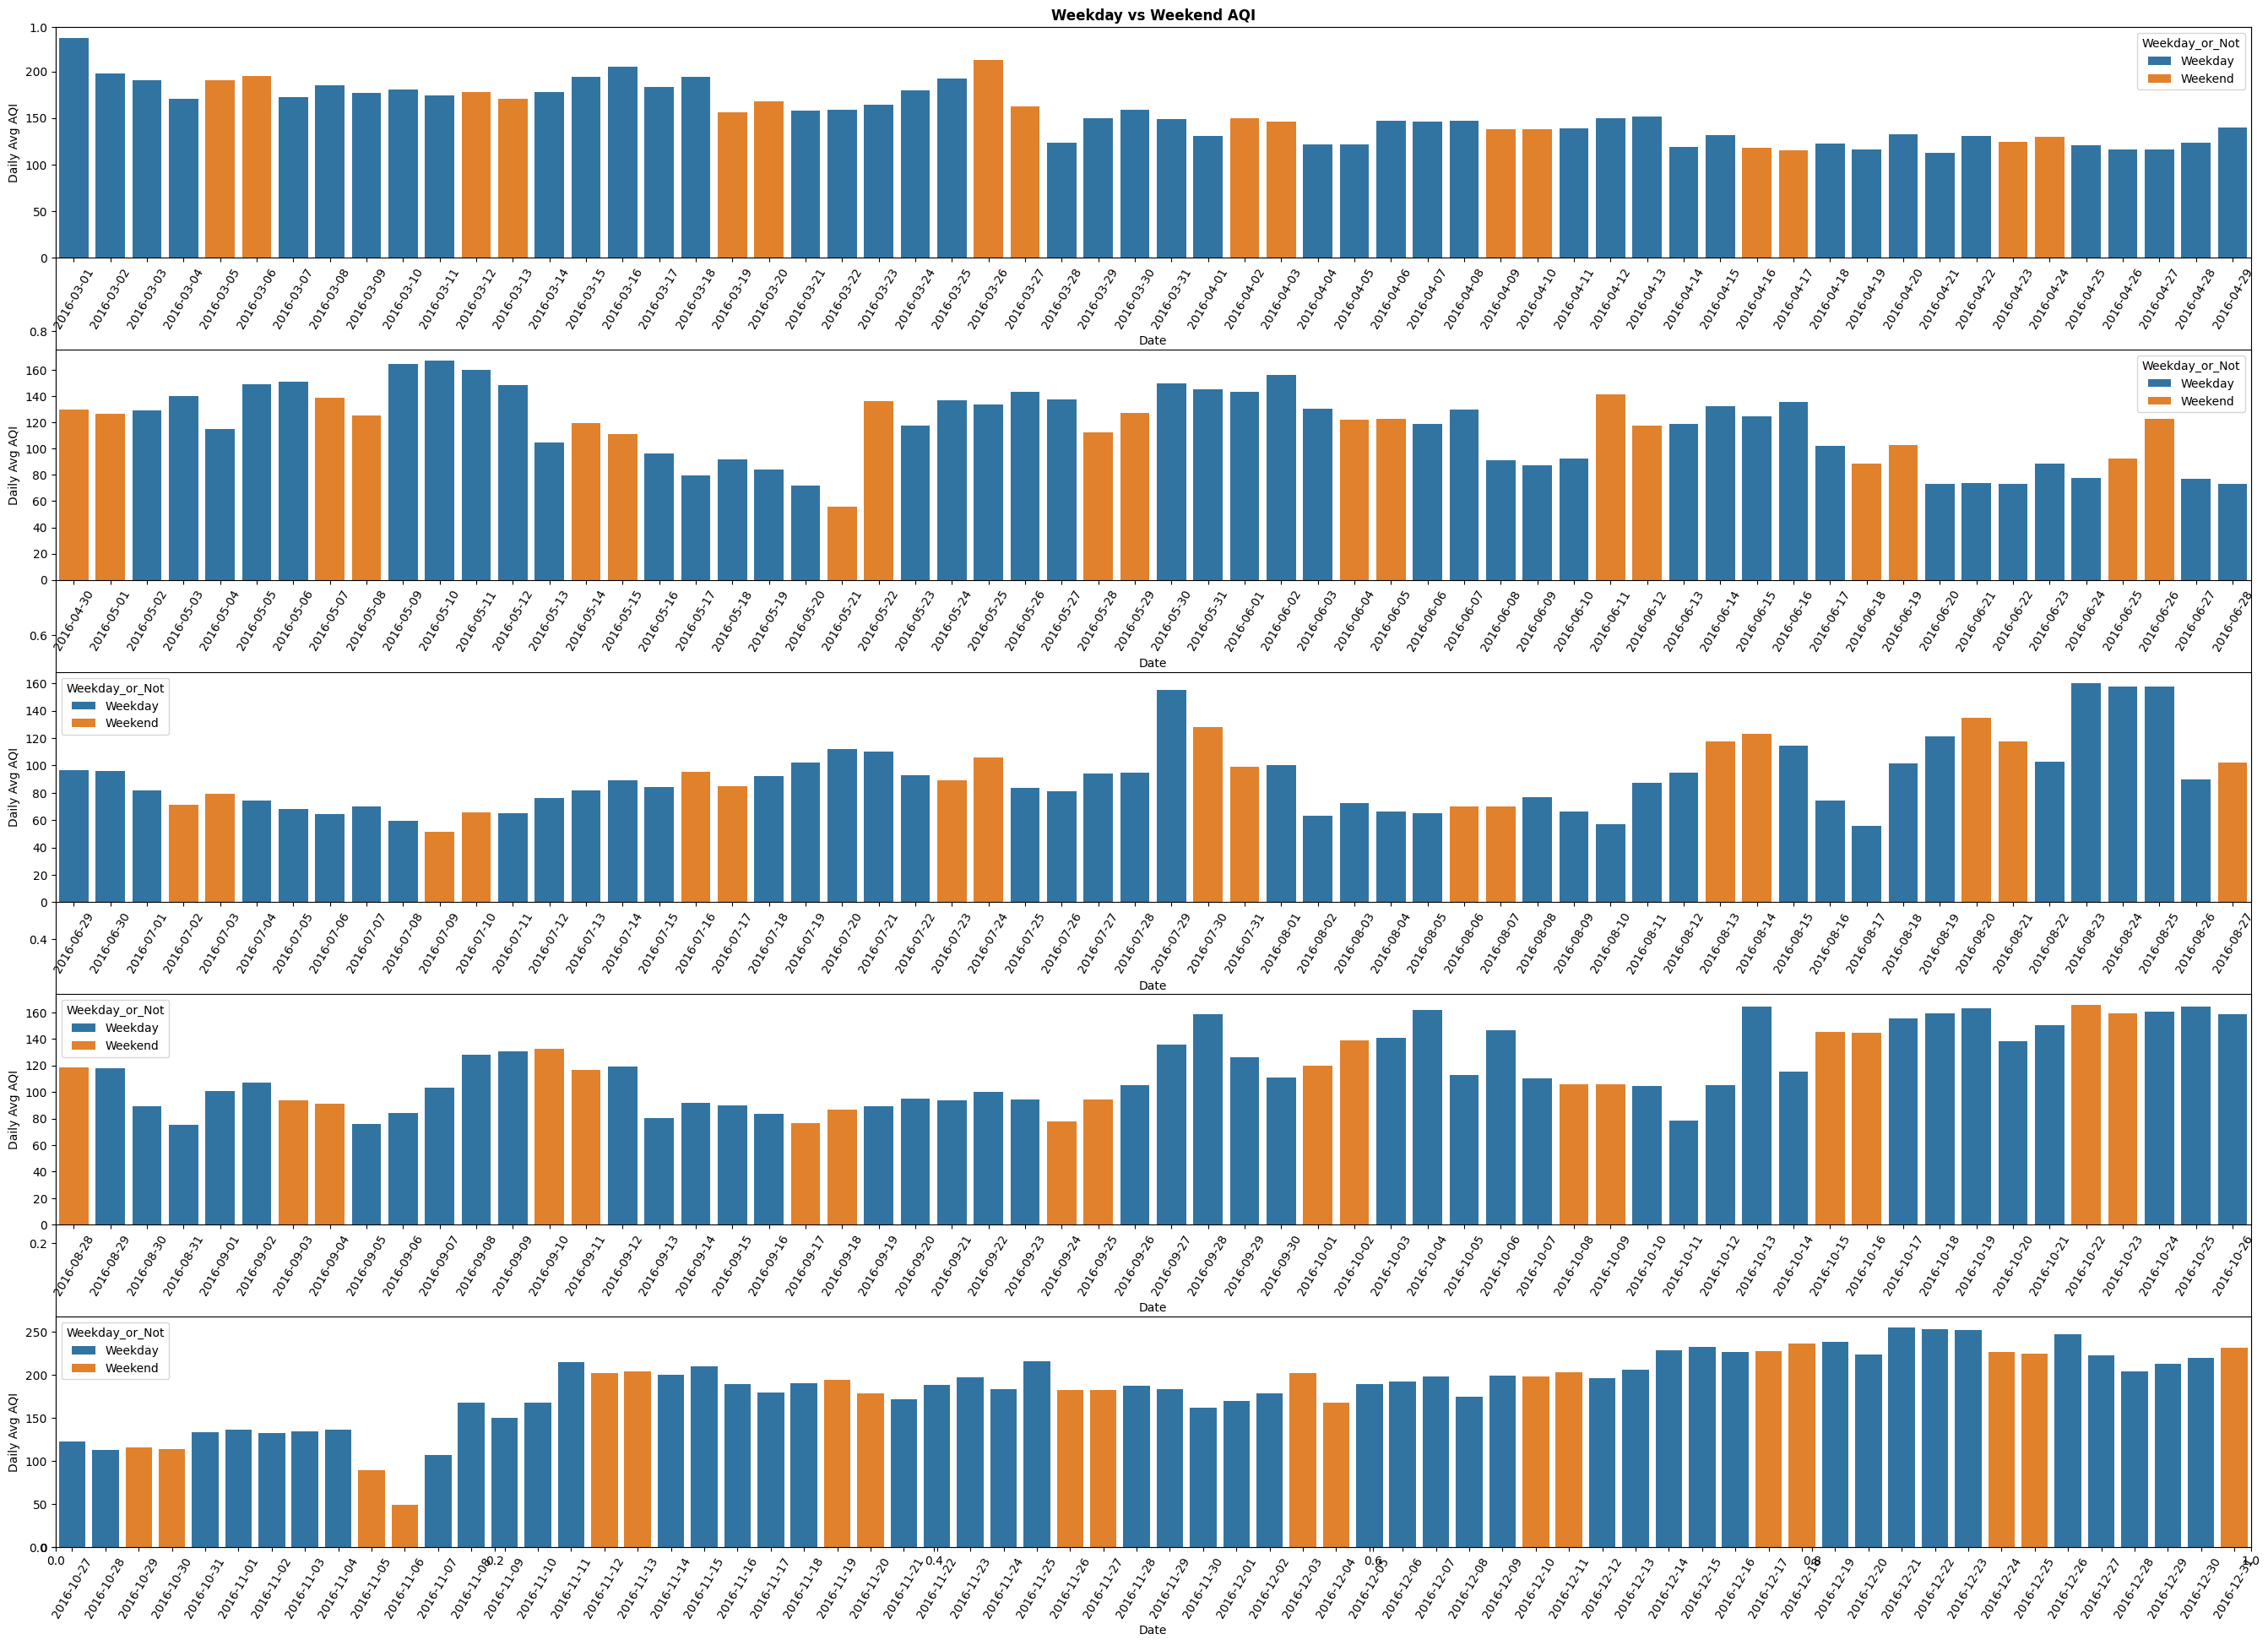

In [226]:
plt.figure(figsize=(20, 20))
plt.title('Weekday vs Weekend AQI', fontweight='bold')
plt.subplot(5, 1, 1)
sns.barplot(x='Date', y='Daily Avg AQI', hue=av['Weekday_or_Not'], data=av[:60])
plt.xticks(rotation=60)

plt.subplot(5, 1, 2)
sns.barplot(x='Date', y='Daily Avg AQI', hue=av['Weekday_or_Not'], data=av[60:120])
plt.xticks(rotation=60)

plt.subplot(5, 1, 3)
sns.barplot(x='Date', y='Daily Avg AQI', hue=av['Weekday_or_Not'], data=av[120:180])
plt.xticks(rotation=60)

plt.subplot(5, 1, 4)
sns.barplot(x='Date', y='Daily Avg AQI', hue=av['Weekday_or_Not'], data=av[180:240])
plt.xticks(rotation=60)

plt.subplot(5, 1, 5)
sns.barplot(x='Date', y='Daily Avg AQI', hue=av['Weekday_or_Not'], data=av[240:])
plt.xticks(rotation=60)

plt.subplots_adjust(left=-0.4, right=0.9, top=0.9, bottom=0, wspace=0.3, hspace=0.4)  # Increase spacing
plt.savefig("week.png") 
plt.show()

From the graph we can see that the avg AQI in a week is almost same, though there is some difference.

**Event-Based Analysis**:
<br/>identifying and analyzing specific high-pollution events by month

In [185]:
ev=av.nlargest(100,'Daily Avg AQI')
ev['month']=ev.Date.apply(lambda i: pd.Timestamp(i).month)
ev.month.value_counts()


month
12    31
3     28
11    22
10    10
5      3
8      3
9      1
6      1
7      1
Name: count, dtype: int64

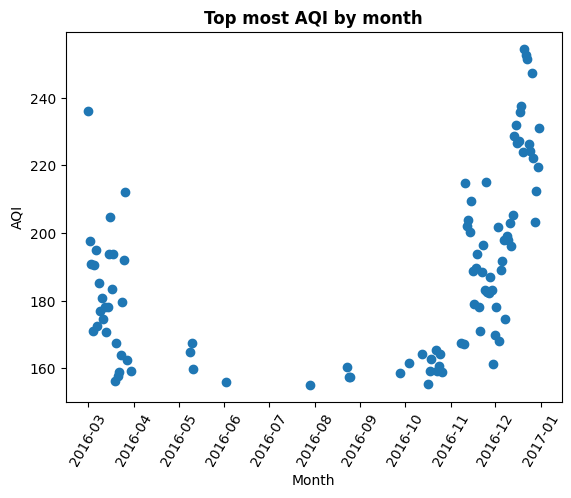

In [229]:
plt.scatter(ev.Date,ev['Daily Avg AQI'])
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Top most AQI by month',fontweight='bold')
plt.xticks(rotation=60)
plt.savefig("Top month.png")

From the graph we can see that Nov, Dec and Mar month have the most high polluted air

**Comparison with Standards**:
<br/>Comparing Dhaka's AQI levels with WHO guidelines and national air quality standards.

In [187]:
df['Std_AQI']=45

In [188]:
above_s=df[df['AQI']>45]['AQI'].count()
below_s=df[df['AQI']<=45]['AQI'].count()
print(f'Number of days inside standard level:{below_s}\nNumber of days outside AQI standard level:{above_s}')

Number of days inside standard level:35
Number of days outside AQI standard level:7191


Almost all the day of Dhaka AQI is above the standard level defined by WHO<br/>
Let's visualize it

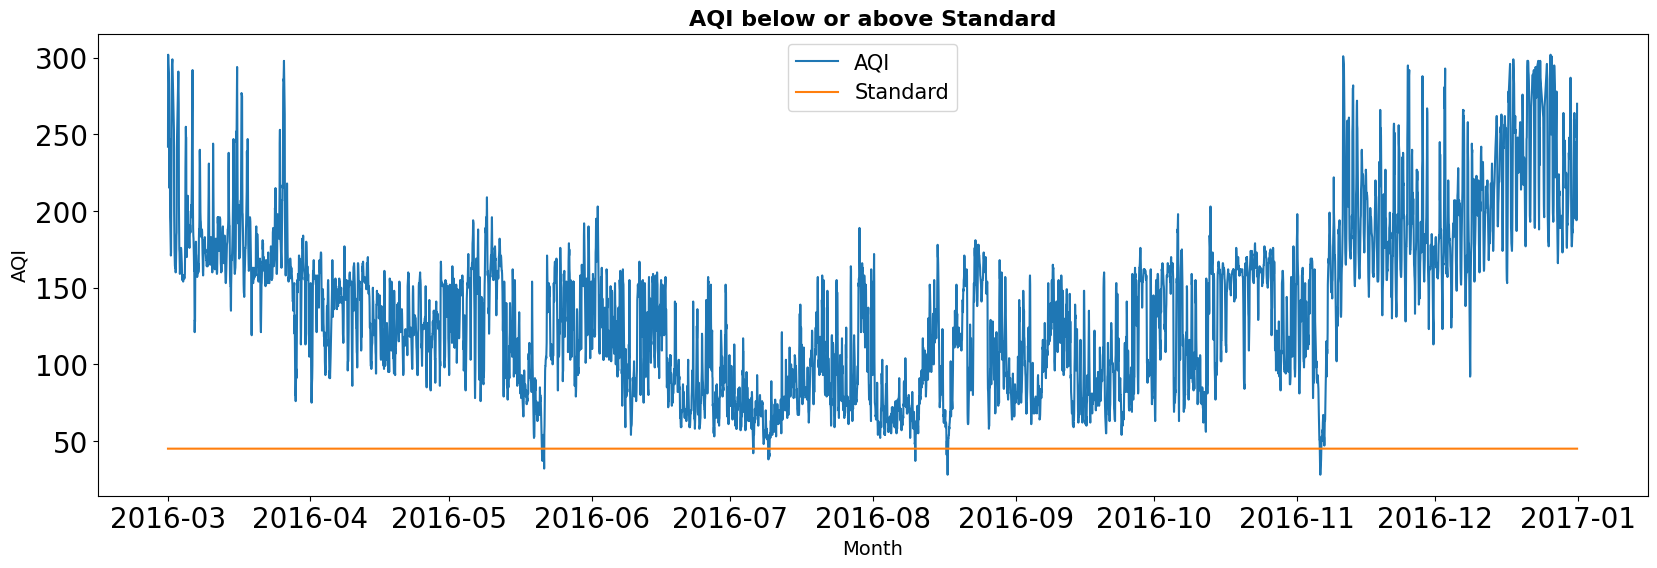

In [234]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.plot(df['Date (LT)'],df['AQI'],label='AQI')
plt.plot(df['Date (LT)'],df['Std_AQI'],label='Standard')
plt.legend(fontsize=15)
plt.xlabel('Month',fontsize=14)
plt.ylabel('AQI',fontsize=14)
plt.title('AQI below or above Standard',fontweight='bold',fontsize=16)
plt.savefig('Standard.png')
plt.show()


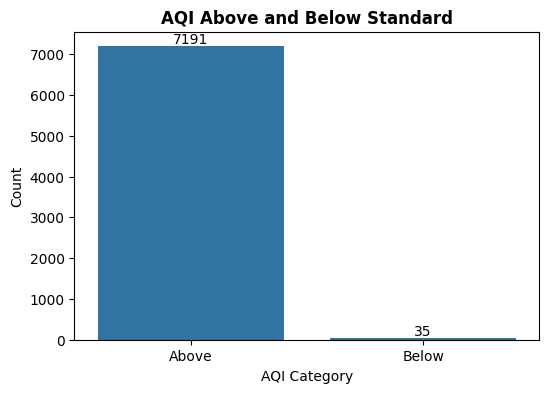

In [213]:
categories = ['Above', 'Below']
counts = [above_s, below_s]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=categories, y=counts,)

for i, value in enumerate(counts):
    ax.text(i, value + 80, str(value), ha='center', fontsize=10)

plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.title("AQI Above and Below Standard", fontweight='bold')
plt.show()
